# Image Classification (Whatsapp Images)



# DataSet downloading from GitHub


In [2]:

!wget https://github.com/pvsureshbaabu/test/archive/master.zip

--2019-12-23 04:50:26--  https://github.com/pvsureshbaabu/test/archive/master.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/pvsureshbaabu/test/zip/master [following]
--2019-12-23 04:50:26--  https://codeload.github.com/pvsureshbaabu/test/zip/master
Resolving codeload.github.com (codeload.github.com)... 192.30.253.120
Connecting to codeload.github.com (codeload.github.com)|192.30.253.120|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: 'master.zip.1'

    [       <=>                             ] 108,138,014 22.7MB/s   in 4.6s   

2019-12-23 04:50:31 (22.7 MB/s) - 'master.zip.1' saved [108138014]



In [3]:
!unzip master.zip

Archive:  master.zip
c5328ad09bc35bae498d4fa85bc6be5b30ae60cc
   creating: test-master/
  inflating: test-master/double.zip  
  inflating: test-master/group.zip   
  inflating: test-master/party.zip   
  inflating: test-master/quotes.zip  
  inflating: test-master/single.zip  
  inflating: test-master/training1.zip  
  inflating: test-master/training1_new.zip  
  inflating: test-master/training2.zip  
  inflating: test-master/training2_new.zip  
  inflating: test-master/validation.zip  
  inflating: test-master/wishes.zip  


In [4]:
!unzip test-master/training1_new.zip
!unzip test-master/training2_new.zip
!unzip test-master/validation.zip


Archive:  test-master/training1_new.zip
   creating: group/
  inflating: group/IMG-20170405-WA0048 - Copy.jpg  
  inflating: group/IMG-20171005-WA0010 - Copy.jpg  
  inflating: group/IMG-20171005-WA0010.jpg  
  inflating: group/IMG-20171019-WA0023 - Copy.jpg  
  inflating: group/IMG-20171019-WA0023.jpg  
  inflating: group/IMG-20180326-WA0017 - Copy.jpg  
  inflating: group/IMG-20180417-WA0014 - Copy.jpg  
  inflating: group/IMG-20180525-WA0027 - Copy.jpg  
  inflating: group/IMG-20180525-WA0035 - Copy.jpg  
  inflating: group/IMG-20180525-WA0035.jpg  
  inflating: group/IMG-20180716-WA0009.jpg  
  inflating: group/IMG-20180804-WA0025.jpg  
  inflating: group/IMG-20180804-WA0026.jpg  
  inflating: group/IMG-20180807-WA0010 - Copy.jpg  
  inflating: group/IMG-20180807-WA0010.jpg  
  inflating: group/IMG-20180809-WA0018 - Copy.jpg  
  inflating: group/IMG-20180809-WA0019 - Copy.jpg  
  inflating: group/IMG-20180827-WA0003 - Copy.jpg  
  inflating: group/IMG-20180827-WA0003.jpg  
  inflat

In [33]:
!ls -l

total 241584
drwxr-xr-x 3 spark 4294967294      4096 Dec 21 15:01 conda
drwxr-xr-x 2 spark 4294967294     20480 Dec 19 11:19 double
-rw-r--r-- 1 spark 4294967294  29941664 Dec 21 15:40 first_try_4.h5
drwxr-xr-x 2 spark 4294967294     20480 Dec 19 11:12 group
drwxr-xr-x 5 spark 4294967294      4096 Dec 21 15:02 images
drwxr-xr-x 2 spark 4294967294      4096 Dec 21 15:01 logs
-rw-r--r-- 1 spark 4294967294 108138014 Dec 21 15:01 master.zip
-rw-r--r-- 1 spark 4294967294 108138014 Dec 21 16:10 master.zip.1
-rw-r--r-- 1 spark 4294967294     39760 Dec 21 15:50 resized.jpg
-rw-r--r-- 1 spark 4294967294      8980 Dec 21 15:44 results.csv
drwxr-xr-x 2 spark 4294967294     20480 Dec 19 11:17 single
drwxr-xr-x 2 spark 4294967294      4096 Dec 21 15:01 spark-events
drwxr-xr-x 2 spark 4294967294      4096 Dec 19 06:00 test-master
drwxr-xr-x 5 spark 4294967294      4096 Dec 21 15:01 user-libs
drwxr-xr-x 8 spark 4294967294      4096 Dec 10 15:15 validation
drwxr-xr-x 2 spark 4294967294     28672 Dec 1

In [ ]:
# Setting up the Training and Validation data set

In [5]:
!mkdir images
!mkdir images/train
!mkdir images/valid
!mkdir images/resized
!mkdir images/train/wishes
!mkdir images/train/double
!mkdir images/train/single
!mkdir images/train/group
!mkdir images/valid/wishes
!mkdir images/valid/double
!mkdir images/valid/single
!mkdir images/valid/group



In [6]:
!cp  double/*.* images/train/double/
!cp  wishes/*.* images/train/wishes/
!cp  single/*.* images/train/single/
!cp  group/*.* images/train/group/

!cp  validation/double/*.* images/valid/double/
!cp  validation/wishes/*.* images/valid/wishes/
!cp  validation/quotes/*.* images/valid/wishes/
!cp  validation/single/*.* images/valid/single/
!cp  validation/party/*.* images/valid/group/
!cp  validation/group/*.* images/valid/group/


In [3]:
!ls -l images/train/double/ | wc -l 
!ls -l images/train/group/  | wc -l
!ls -l images/train/single/ | wc -l 
!ls -l images/train/wishes/ | wc -l 

!ls -l images/valid/double/ | wc -l 
!ls -l images/valid/group/  | wc -l 
!ls -l images/valid/single/ | wc -l 
!ls -l images/valid/wishes/ | wc -l 



255
211
257
322
26
109
14
90


In [ ]:
# Tools installation for data set understanding and checking the images in each category. Here the data set is unbalanced and repeated the images in the classes
# where the data availability is low.
# Checked the images visually does they make sense or not for each category
# Installed the OpenCV for image analysis and if required scaling etc.

In [5]:
!pip install opencv-python

  Using cached https://files.pythonhosted.org/packages/c0/a9/9828dfaf93f40e190ebfb292141df6b7ea1a2d57b46263e757f52be8589f/opencv_python-4.1.2.30-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/92/e6/45f71bd24f4e37629e9db5fb75caab919507deae6a5a257f9e4685a5f931/numpy-1.18.0-cp36-cp36m-manylinux1_x86_64.whl
tensorflow 1.13.1 requires tensorboard<1.14.0,>=1.13.0, which is not installed.
Target directory /home/spark/shared/user-libs/python3.6/numpy already exists. Specify --upgrade to force replacement.
Target directory /home/spark/shared/user-libs/python3.6/cv2 already exists. Specify --upgrade to force replacement.
Target directory /home/spark/shared/user-libs/python3.6/opencv_python-4.1.2.30.dist-info already exists. Specify --upgrade to force replacement.
Target directory /home/spark/shared/user-libs/python3.6/numpy-1.18.0.dist-info already exists. Specify --upgrade to force replacement.
Target directory /home/spark/shared/user-libs/python3.6/bin 

In [6]:
import os, sys
import matplotlib.pyplot as plt
import cv2
from PIL import Image

#image = Image.open('images/train/double/IMG-20190630-WA0006.jpg')
#image.show()
image = cv2.imread('images/train/double/IMG-20190630-WA0006.jpg',0)

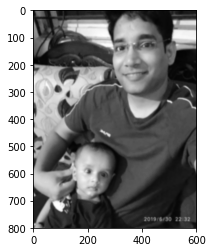

In [7]:
plt.imshow(image, cmap = 'gray', interpolation = 'bicubic')
plt.show()

In [ ]:
# Deep Learning model using Keras has been built for this purpose. Picked the number of layers and convolutional filters such by multiple iterations where model is not overfit for the avialable data.

In [9]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras import optimizers
from keras.layers import Activation, Dropout, Flatten, Dense, advanced_activations, LeakyReLU
from keras import backend as K
#**import tkinter as tk
#from tkinter import filedialog
import os.path
import numpy as np

#fix random seed for reproducibility
seed = 1975
np.random.seed(seed)
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#root = tk.Tk()
#root.withdraw()
#train_data_dir = filedialog.askdirectory(parent=root,initialdir="//",title='Pick a directory')
#validation_data_dir  = filedialog.askdirectory(parent=root,initialdir="//",title='Pick a directory')
train_data_dir = 'images/train'
validation_data_dir = 'images/valid'
save_data_dir = 'images/resized'
#file_path = filedialog.askopenfilename()
nb_train_samples = sum([len(files) for r, d, files in os.walk(train_data_dir)])
nb_validation_samples = sum([len(files) for r, d, files in os.walk(validation_data_dir)])

print('no. of trained samples = ', nb_train_samples, ' no. of validation samples= ',nb_validation_samples)


#dimensions of our images.
img_width, img_height = 352, 352

#train_data_dir = r'C:\Users\yasser\Desktop\Caltec_101_Database\101_ObjectCategories_2C\train_images'
#validation_data_dir = r'C:\Users\yasser\Desktop\Caltec_101_Database\101_ObjectCategories_2C\test_images'
#nb_train_samples = 60
#nb_validation_samples = 30

epochs = 40
batch_size = 16

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
#model.add(LeakyReLU(alpha=0.01))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
#model.add(LeakyReLU(alpha=0.01))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
#model.add(LeakyReLU(alpha=0.01))
model.add(MaxPooling2D(pool_size=(2, 2)))
          
model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
#model.add(LeakyReLU(alpha=0.01))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
#model.add(LeakyReLU(alpha=0.01))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(4))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

#this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

#this is the augmentation configuration we will use for testing:
#only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    seed=42)

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    seed=42)

history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

model.save_weights('first_try_3.h5')


no. of trained samples =  1041  no. of validation samples=  235
Found 1041 images belonging to 4 classes.
Found 235 images belonging to 4 classes.
Epoch 1/40
65/65 [==============================] - 278s 4s/step - loss: 1.8699 - acc: 0.2971 - val_loss: 1.2324 - val_acc: 0.3884
Epoch 2/40
65/65 [==============================] - 268s 4s/step - loss: 1.2787 - acc: 0.3989 - val_loss: 1.4035 - val_acc: 0.3881
Epoch 3/40
65/65 [==============================] - 267s 4s/step - loss: 1.1692 - acc: 0.4482 - val_loss: 1.0526 - val_acc: 0.5205
Epoch 4/40
65/65 [==============================] - 268s 4s/step - loss: 1.0612 - acc: 0.5001 - val_loss: 0.8182 - val_acc: 0.5753
Epoch 5/40
65/65 [==============================] - 267s 4s/step - loss: 0.9660 - acc: 0.5501 - val_loss: 0.7753 - val_acc: 0.6575
Epoch 6/40
65/65 [==============================] - 267s 4s/step - loss: 0.9135 - acc: 0.5999 - val_loss: 0.8910 - val_acc: 0.6986
Epoch 7/40
65/65 [==============================] - 270s 4s/step - 

KeyboardInterrupt: 

In [ ]:
# Validation data itself is used as the test data base and measured the accuracy and saved output as .csv file
# Complete epoch history during training process is stored and visualized.

In [10]:
import pandas as pd
test_data_dir = 'images/valid'
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=1,
    class_mode=None,
    shuffle=False,
    seed=42
)
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
test_generator.reset()
pred=model.predict_generator(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)
predicted_class_indices=np.argmax(pred,axis=1)
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
print(pred)
#filenames=test_generator.filenames

#filenames["prediction"] = predictions
#filenames.to_csv("my_output.csv")

#data1 = np.array([filenames,predictions])
#data1 = data1.T
#np.savetxt
#print(predictions)
#from pyspark.sql.types import *
#field = [StructField("Filename",StringType(), True),StructField("Predictions",StringType(), True)]
#schema = StructType(field)
#pd = sqlContext.createDataFrame(sc.emptyRDD(), schema)

filenames=test_generator.filenames
results=pd.DataFrame({"Filename":filenames,"Predictions":predictions})
results.to_csv("results.csv",index=False)

#results.show()

Found 235 images belonging to 4 classes.
235/235 [==============================] - 23s 97ms/step
[[6.48558736e-01 3.48450333e-01 2.98260618e-03 8.23991650e-06]
 [5.01793265e-01 1.71448410e-01 3.25754315e-01 1.00397703e-03]
 [2.13594381e-02 1.47111073e-01 7.84386247e-02 7.53090858e-01]
 [8.98956180e-01 5.28094471e-02 4.64680046e-02 1.76635874e-03]
 [2.29740679e-01 7.48358965e-01 2.09319759e-02 9.68303822e-04]
 [6.29735291e-01 3.33869904e-01 3.63520533e-02 4.28044550e-05]
 [3.38790044e-02 4.28290159e-01 5.15645027e-01 2.21858453e-02]
 [4.09574300e-01 4.54542011e-01 1.25573128e-01 1.03105791e-02]
 [7.79092133e-01 3.35716568e-02 1.87332556e-01 3.71942838e-06]
 [1.35506809e-01 8.57789636e-01 5.28381160e-03 1.41972001e-03]
 [2.95366853e-01 1.18195668e-01 5.86324275e-01 1.13248272e-04]
 [4.25556535e-03 3.63532640e-02 9.56828237e-01 2.56282673e-03]
 [3.55493009e-01 1.31297693e-01 5.12633920e-01 5.75345533e-04]
 [1.55736625e-01 5.09111941e-01 3.34785044e-01 3.66433844e-04]
 [8.93750414e-02 4.6

In [11]:
import matplotlib.pyplot as plt


print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


NameError: name 'history' is not defined

In [11]:
!ls -l


total 135516
drwxr-xr-x 3 spark 4294967294      4096 Dec 21 15:01 conda
drwxr-xr-x 2 spark 4294967294     20480 Dec 19 11:19 double
-rw-r--r-- 1 spark 4294967294  29941664 Dec 21 15:40 first_try_4.h5
drwxr-xr-x 2 spark 4294967294     20480 Dec 19 11:12 group
drwxr-xr-x 5 spark 4294967294      4096 Dec 21 15:02 images
drwxr-xr-x 2 spark 4294967294      4096 Dec 21 15:01 logs
-rw-r--r-- 1 spark 4294967294 108138014 Dec 21 15:01 master.zip
-rw-r--r-- 1 spark 4294967294      8980 Dec 21 15:44 results.csv
drwxr-xr-x 2 spark 4294967294     20480 Dec 19 11:17 single
drwxr-xr-x 2 spark 4294967294      4096 Dec 21 15:01 spark-events
drwxr-xr-x 2 spark 4294967294      4096 Dec 19 06:00 test-master
drwxr-xr-x 5 spark 4294967294      4096 Dec 21 15:01 user-libs
drwxr-xr-x 8 spark 4294967294      4096 Dec 10 15:15 validation
drwxr-xr-x 2 spark 4294967294     28672 Dec 19 11:16 wishes


In [13]:
!ls -l images/resized

total 1254800
-rw-r--r-- 1 spark 4294967294 212576 Dec 21 15:15 _0_1805665.png
-rw-r--r-- 1 spark 4294967294 201142 Dec 21 15:05 _0_2628198.png
-rw-r--r-- 1 spark 4294967294 192691 Dec 21 15:19 _0_2722603.png
-rw-r--r-- 1 spark 4294967294 210146 Dec 21 15:08 _0_3543190.png
-rw-r--r-- 1 spark 4294967294 191433 Dec 21 15:25 _0_5852533.png
-rw-r--r-- 1 spark 4294967294 199252 Dec 21 15:32 _0_6373612.png
-rw-r--r-- 1 spark 4294967294 190548 Dec 21 15:28 _0_6628290.png
-rw-r--r-- 1 spark 4294967294 211935 Dec 21 15:36 _0_7603546.png
-rw-r--r-- 1 spark 4294967294 139073 Dec 21 15:05 _1000_3591543.png
-rw-r--r-- 1 spark 4294967294 127855 Dec 21 15:23 _1000_3719851.png
-rw-r--r-- 1 spark 4294967294 143535 Dec 21 15:36 _1000_485644.png
-rw-r--r-- 1 spark 4294967294 145141 Dec 21 15:28 _1000_6019422.png
-rw-r--r-- 1 spark 4294967294 140751 Dec 21 15:14 _1000_8217421.png
-rw-r--r-- 1 spark 4294967294 119323 Dec 21 15:11 _1000_8309132.png
-rw-r--r-- 1 spark 4294967294 124044 Dec 21 15:19 _1000_903

In [ ]:
from keras.models import load_model
from keras.preprocessing.image import img_to_array, load_img

#test_model = load_model('first_try_2.h5')
img = load_img('images/valid/single/IMG_20191027_083925.jpg',False,target_size=(img_width,img_height))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
preds = model.predict(x)
y_classes = preds.argmax(axis=-1)
print(y_classes)
#y_true = train_generator.classes

In [ ]:
pred = model.predict_generator(train_generator, steps=len(train_generator), verbose=0)
# Get classes by max element in np (as a list)
classes = list(np.argmax(pred, axis=1))
# Get filenames (set shuffle=false in generator is important)
filenames = train_generator.filenames
print(classes)

In [ ]:
print(filenames,classes)

In [23]:
!pip install opencv-python

    100% |################################| 28.3MB 546kB/s eta 0:00:01
    100% |################################| 20.0MB 870kB/s eta 0:00:01
tensorflow 1.13.1 requires tensorboard<1.14.0,>=1.13.0, which is not installed.


In [17]:
import os, sys

In [18]:
import matplotlib.pyplot as plt

In [24]:
import cv2

In [42]:
from PIL import Image

In [ ]:
image = Image.open('images/double/IMG-20190630-WA0006.jpg')
image.show()

In [ ]:
plt.imshow(image[:,:,::-1]); plt.show()

In [30]:

image = cv2.imread('images/resized/_0_2628198.png')

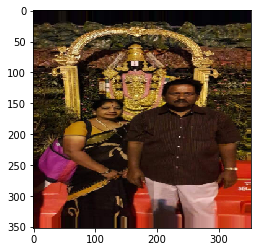

In [31]:
plt.imshow(image[:,:,::-1]); plt.show()